# Select a fiew star with the color V-I
- Author : Sylvie Dagoret-Campagne
- Creation : April 27th 2020


In [31]:
import os,sys
import numpy as np

In [32]:
from astropy.table import Table
from astropy.io import fits

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [34]:
import pysynphot as S

In [35]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [36]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

In [37]:
! ls

1_MakeCalspecList.ipynb                all_viscalspec_relspectra_lin.png
1bis_MakeHDCalspecList.ipynb           all_viscalspec_spectra_lin.pdf
2_ViewCalspecSpectra.ipynb             all_viscalspec_spectra_lin_renorm.png
3_ViewCalspecColors.ipynb              all_viscalspec_spectra_lin_renorm2.png
4_ViewCalspecObsFlux.ipynb             all_viscalspec_spectra_log.pdf
5_SelectFiewColors.ipynb               all_viscalspec_spectra_log.png
README.md                              table_summary_allcalspec.fits
all_viscalspec_relspectra_lin.pdf      table_summary_allcalspec_torenorm.fits


# Read table with re-calculated magnitudes

In [38]:
t=Table.read('table_summary_allcalspec_torenorm.fits')

In [39]:
t.show_in_notebook()

idx,OBJNAME,RA,DEC,SP_TYPE,SP_QUAL,magU,magB,magV,magR,magI,FILES,calcU,calcB,calcV,calcR,calcI,factor,VmI
0,NGC7293,337.411,-20.837,DAO.5,C,11.894,13.158,13.524,13.689,13.898,ngc7293_005.fits,11.896,13.163,13.529,13.733,14.238,25.807,-0.709
1,FEIGE67,190.466,17.522,sdOpec,D,10.261,11.700,11.630,11.969,12.159,feige67_002.fits,10.235,11.461,11.803,11.987,12.467,5.2613,-0.664
2,GD50,57.209,-0.976,DA1.2,C,12.596,13.787,14.063,14.210,14.388,gd50_004.fits,12.653,13.800,14.034,14.217,14.678,41.093,-0.643
3,FEIGE66,189.348,25.067,sdB1(k),C,9.117,10.260,10.590,10.642,10.809,feige66_002.fits,9.102,10.208,10.479,10.642,11.100,1.5539,-0.622
4,GD108,150.197,-7.559,sdB,D,12.406,13.349,13.563,13.662,13.781,gd108_005.fits,12.391,13.331,13.549,13.658,14.077,26.281,-0.528
5,G93-48,328.106,2.389,DA2.8,C,11.942,12.732,12.743,12.839,12.938,g93_48_004.fits,11.961,12.701,12.720,12.836,13.238,12.244,-0.519
6,HZ2,63.181,11.864,DA2.3,C,12.903,13.787,13.877,13.984,14.094,hz2_005.fits,12.922,13.776,13.841,13.948,14.343,34.379,-0.503
7,HZ44,200.897,36.133,sdBN0VIIHe28,B,10.186,11.420,11.650,12.000,11.995,hz44_stis_004.fits,10.191,11.372,11.644,11.825,12.114,4.5475,-0.470
8,HZ21,183.484,32.942,DO1,C,13.125,14.361,14.688,14.837,15.038,hz21_stis_004.fits,13.113,14.339,14.669,14.848,15.136,73.723,-0.467
9,HZ43,199.091,29.099,DAwk+M3.5Ve,D,100000000000000000000.000,12.520,12.660,100000000000000000000.000,100000000000000000000.000,hz43_stis_004.fits,11.413,12.605,12.896,13.080,13.356,14.402,-0.460


# Show the color V-I

Text(0, 0.5, 'color V - I')

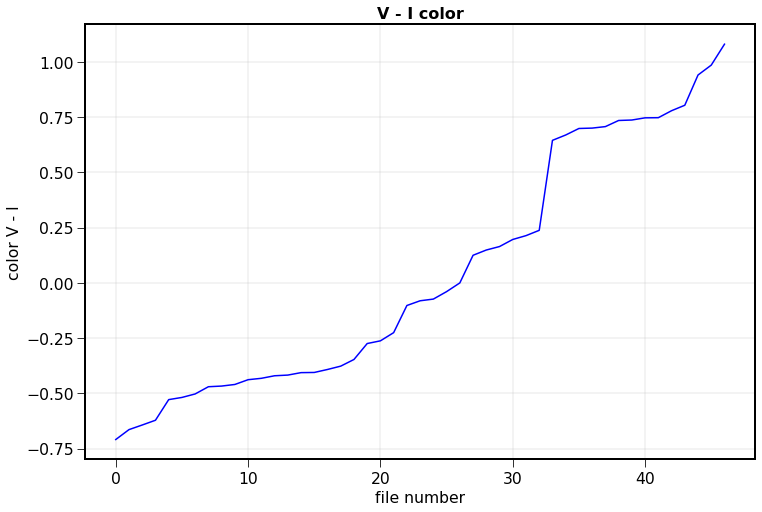

In [40]:
plt.plot(t["VmI"],"b-")
plt.grid()
plt.title("V - I color")
plt.xlabel("file number")
plt.ylabel("color V - I")

# Select a few stars with target colors

In [41]:
all_colors=t["VmI"]

In [42]:
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return a.flat[idx],int(idx)

In [43]:
# list of target colors
target_VmI=np.array([-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
NBVmItarget=len(target_VmI)

In [44]:
filesselected_index=np.zeros(NBVmItarget)
filesselected_VmI=np.zeros(NBVmItarget)

In [45]:
idx=0
for vmi in target_VmI:
    thevmi,theidx=find_nearest(all_colors,vmi)
    print(thevmi,theidx)
    filesselected_index[idx]=int(theidx)
    filesselected_VmI[idx]=thevmi
    idx+=1  

-0.7091116334565228 0
-0.5027230111133143 6
-0.26223308245042176 20
0.0 26
0.23810310766206388 32
0.6455625390076491 33
0.7480985189423031 41
0.9862277306899365 45


In [46]:
filesselected_index

array([ 0.,  6., 20., 26., 32., 33., 41., 45.])

In [47]:
filesselected_VmI

array([-0.70911163, -0.50272301, -0.26223308,  0.        ,  0.23810311,
        0.64556254,  0.74809852,  0.98622773])

In [48]:
t_selected=Table(t[0])
for idx in filesselected_index[1:]:
    t_selected.add_row(t[int(idx)])

In [49]:
t_selected.show_in_notebook()

idx,OBJNAME,RA,DEC,SP_TYPE,SP_QUAL,magU,magB,magV,magR,magI,FILES,calcU,calcB,calcV,calcR,calcI,factor,VmI
0,NGC7293,337.411,-20.837,DAO.5,C,11.894,13.158,13.524,13.689,13.898,ngc7293_005.fits,11.896,13.163,13.529,13.733,14.238,25.807,-0.709
1,HZ2,63.181,11.864,DA2.3,C,12.903,13.787,13.877,13.984,14.094,hz2_005.fits,12.922,13.776,13.841,13.948,14.343,34.379,-0.503
2,HZ4,58.842,9.788,DA3.4,C,13.917,14.592,14.506,14.580,14.642,hz4_stis_005.fits,13.940,14.577,14.465,14.569,14.727,61.07,-0.262
3,ALPHA_LYR,279.235,38.784,A0Va,C,0.030,0.030,0.030,0.070,0.100,alpha_lyr_stis_008.fits,0.000,0.000,0.000,0.000,0.000,0.0001,0.000
4,HD163466,268.106,60.396,A2,D,100000000000000000000.000,7.040,6.850,100000000000000000000.000,100000000000000000000.000,hd163466_stis_004.fits,7.139,7.019,6.831,6.694,6.593,0.053984,0.238
5,HD074000,130.212,-16.345,F2,D,9.840,10.090,9.660,100000000000000000000.000,100000000000000000000.000,hd074000_stis_003.fits,9.831,10.048,9.636,9.268,8.991,0.71544,0.646
6,HD111980,193.313,-18.522,F7V,C,8.800,8.910,8.380,100000000000000000000.000,100000000000000000000.000,hd111980_stis_003.fits,8.773,8.875,8.350,7.920,7.602,0.21872,0.748
7,FLAT,0.000,0.000,flat,0,9.709,10.361,10.000,9.509,9.014,flat,9.709,10.361,10.000,9.509,9.014,1,0.986


# Save selected stars sample

In [51]:
t_selected.write('table_summary_selectedcalspec.fits', overwrite=True)  